Euler

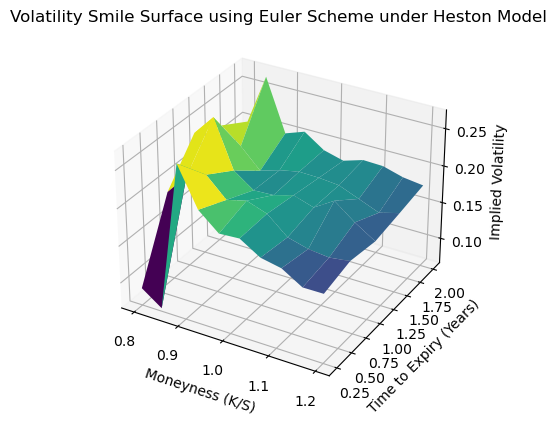

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from MonteCarloSimulator import MonteCarloSimulator
from EulerScheme import EulerScheme
from OptionPricer import OptionPricer
from HestonModel import HestonModel
from scipy.stats import norm

def BlackScholesCall(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European call option.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to maturity (in years)
    :param r: Risk-free interest rate
    :param sigma: Volatility of the underlying asset
    :return: Call option price
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Calculate call option price
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price
# Parameters
S0 = 100  # Initial stock price
v0 = 0.04  # Initial volatility
kappa = 1.5  # Mean reversion rate
theta = 0.04  # Long-term variance
sigma = 0.3  # Volatility of volatility
rho = -0.7  # Correlation
r = 0.03  # Risk-free rate

heston_model = HestonModel(S0, v0, kappa, theta, sigma, rho, r)

# Define range of strikes and expiries
strikes = np.linspace(80, 120, 10)  # Strike prices from 80 to 120
expiries = np.linspace(0.25, 2, 5)  # Expiries from 3 months to 2 years

# Placeholder for implied volatilities
implied_vols = np.zeros((len(strikes), len(expiries)))

# Monte Carlo settings
num_paths = 1000
num_steps = 500

# Calculate option prices and implied volatilities
for i, K in enumerate(strikes):
    for j, T in enumerate(expiries):
        # Use Euler scheme for simulation
        euler_scheme = EulerScheme(S0, v0, kappa, theta, sigma, rho, r)
        simulator = MonteCarloSimulator(heston_model, euler_scheme, num_paths, T, num_steps)
        option_pricer = OptionPricer(simulator)
        
        # Calculate European call price
        mc_price = option_pricer.european_call(K)

        # Calculate implied volatility
        def bs_price_diff(vol):
            # Define Black-Scholes formula for a European call price difference
            return BlackScholesCall(S0, K, T, r, vol) - mc_price
        
        implied_vol = minimize(lambda vol: bs_price_diff(vol)**2, x0=0.2).x[0]
        implied_vols[i, j] = implied_vol

# Plotting the volatility smile surface
X, Y = np.meshgrid(strikes / S0, expiries)  # Moneyness (K/S) and expiry time grid
Z = implied_vols.T  # Transpose to match X, Y grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis")
ax.set_xlabel("Moneyness (K/S)")
ax.set_ylabel("Time to Expiry (Years)")
ax.set_zlabel("Implied Volatility")
plt.title("Volatility Smile Surface using Euler Scheme under Heston Model")
plt.show()


MilsteinScheme

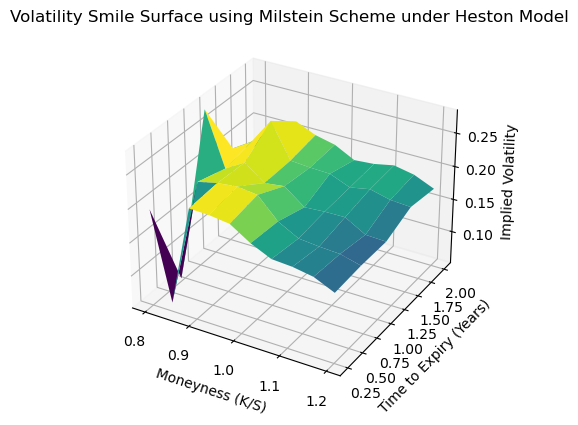

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from MonteCarloSimulator import MonteCarloSimulator
from MilsteinScheme import MilsteinScheme
from OptionPricer import OptionPricer
from HestonModel import HestonModel

# Parameters
S0 = 100  # Initial asset price
v0 = 0.04  # Initial volatility
kappa = 1.5  # Mean reversion rate
theta = 0.04  # Long-term mean
sigma = 0.3  # Volatility of volatility
rho = -0.7  # Correlation between asset price and volatility
r = 0.03  # Risk-free interest rate

heston_model = HestonModel(S0, v0, kappa, theta, sigma, rho, r)

# Define a range of strikes and expiries
strikes = np.linspace(80, 120, 10)  # Strike prices from 80 to 120
expiries = np.linspace(0.25, 2, 5)  # Expiries from 3 months to 2 years

# Placeholder for implied volatilities
implied_vols = np.zeros((len(strikes), len(expiries)))

# Monte Carlo settings
num_paths = 1000
num_steps = 500

# Calculate option prices and implied volatilities
for i, K in enumerate(strikes):
    for j, T in enumerate(expiries):
        # Use Milstein scheme for simulation
        milstein_scheme = MilsteinScheme(S0, v0, kappa, theta, sigma, rho, r)
        simulator = MonteCarloSimulator(heston_model, milstein_scheme, num_paths, T, num_steps)
        option_pricer = OptionPricer(simulator)
        
        # Calculate European call price
        mc_price = option_pricer.european_call(K)

        # Calculate implied volatility
        def bs_price_diff(vol):
            # Define the difference between Black-Scholes price and Monte Carlo price
            return BlackScholesCall(S0, K, T, r, vol) - mc_price
        
        implied_vol = minimize(lambda vol: bs_price_diff(vol)**2, x0=0.2).x[0]
        implied_vols[i, j] = implied_vol

# Plotting the volatility smile surface
X, Y = np.meshgrid(strikes / S0, expiries)  # Moneyness (K/S) and expiry time grid
Z = implied_vols.T  # Transpose to match X, Y grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis")
ax.set_xlabel("Moneyness (K/S)")
ax.set_ylabel("Time to Expiry (Years)")
ax.set_zlabel("Implied Volatility")
plt.title("Volatility Smile Surface using Milstein Scheme under Heston Model")
plt.show()
